# Tensorflow tutorial

In this seminar, we're going to play with [Tensorflow](https://www.tensorflow.org/) and see how it helps us build deep learning models.

If you're running this notebook outside course environment, you'll need to install tensorflow:
* `pip install tensorflow` should install cpu-only TF on Linux & Mac OS
* If you want GPU support from offset, see [TF install page](https://www.tensorflow.org/install/)

# Warming up
For starters, let's implement a python function that computes the sum of squares of numbers from 0 to N-1.
* Use numpy or python
* An array of numbers 0 to N - numpy.arange(N)

In [1]:
import numpy as np
def sum_squares(N):
    return np.sum(np.arange(N) ** 2)#<student.Implement_me()>

In [2]:
%%time
sum_squares(10 ** 8)

CPU times: user 164 ms, sys: 77.2 ms, total: 241 ms
Wall time: 240 ms


662921401752298880

# Tensoflow teaser

Doing the very same thing

In [3]:
import tensorflow as tf
s = tf.InteractiveSession()

#I gonna be your function parameter
N = tf.placeholder('int64', name="input_to_your_function")

#i am a recipe on how to produce sum of squares of arange of N given N
result = tf.reduce_sum((tf.range(N) ** 2))

In [4]:
%%time
#example of computing the same as sum_squares
print(result.eval({N: 10 ** 8}))

662921401752298880
CPU times: user 466 ms, sys: 277 ms, total: 743 ms
Wall time: 622 ms


In [5]:
%%time
s.run([result, result + 1], {N: 10 ** 8})

CPU times: user 393 ms, sys: 5.59 ms, total: 398 ms
Wall time: 265 ms


[662921401752298880, 662921401752298881]

In [6]:
%%time
result.eval({N: 10 ** 8})
(result + 1).eval({N: 10 ** 8})

CPU times: user 790 ms, sys: 13.7 ms, total: 804 ms
Wall time: 503 ms


Look at the last two times. Why do you think they're so different?

# How does it work?
1. define placeholders where you'll send inputs;
2. make symbolic graph: a recipe for mathematical transformation of those placeholders;
3. compute outputs of your graph with particular values for each placeholder
  * output.eval({placeholder:value}) 
  * s.run(output, {placeholder:value})

* So far there are two main entities: "placeholder" and "transformation"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be int32/64, floats of booleans (uint8) of various size.

* You can define new transformations as an arbitrary operation on placeholders and other transformations
 * tf.reduce_sum(tf.arange(N)\**2) are 3 sequential transformations of placeholder N
 * There's a tensorflow symbolic version for every numpy function
   * `a+b, a/b, a**b, ...` behave just like in numpy
   * np.mean -> tf.reduce_mean
   * np.arange -> tf.range
   * np.cumsum -> tf.cumsum
   * If if you can't find the op you need, see the docs [docs](https://www.tensorflow.org/api_docs/python).
 
 
Still confused? We gonna fix that.

In [7]:
#Default placeholder that can be arbitrary float32 scalar, vertor, matrix, etc.
arbitrary_input = tf.placeholder('float32')

#Input vector of arbitrary length
input_vector = tf.placeholder('float32', shape=(None,))

#Input vector that _must_ have 10 elements and integer type
fixed_vector = tf.placeholder('int32', shape=(10,))

#Matrix of arbitrary n_rows and 15 columns (e.g. a minibatch your data table)
input_matrix = tf.placeholder('float32', shape=(None, 15))

#You can generally use None whenever you don't need a specific shape
input1 = tf.placeholder('float64', shape=(None, 100, None))
input2 = tf.placeholder('int32', shape=(None, None, 3, 224, 224))

In [8]:
#elementwise multiplication
double_the_vector = input_vector * 2

#elementwise cosine
elementwise_cosine = tf.cos(input_vector)

#difference between squared vector and vector itself
vector_squares = input_vector ** 2 - input_vector

In [9]:
#Practice time:
#create two vectors of type float32
my_vector = tf.placeholder('float32', shape=(None,))
my_vector2 = tf.placeholder('float32', shape=(None,))

In [10]:
#Write a transformation(recipe):
#(vec1)*(vec2) / (sin(vec1) +1)
my_transformation = my_vector * my_vector2 /  (tf.sin(my_vector) + 1)

In [11]:
print(my_transformation)
#it's okay, it's a symbolic graph

Tensor("truediv:0", shape=(?,), dtype=float32)


In [12]:
dummy = np.arange(5).astype('float32')
my_transformation.eval({my_vector: dummy, my_vector2: dummy[::-1]})

array([ 0.        ,  1.62913239,  2.09501147,  2.62899613,  0.        ], dtype=float32)

### Visualizing graphs

It's often useful to visualize the computation graph when debugging or optimizing. 
Interactive visualization is where tensorflow really shines as compared to other frameworks. 

There's a special instrument for that, called Tensorboard. You can launch it from console:

```tensorboard --logdir=/tmp/tboard --port=7007```

If you're pathologically afraid of consoles, try this:

```os.system("tensorboard --logdir=/tmp/tboard --port=7007 &"```

_(but don't tell anyone we taught you that)_

In [13]:
#launch tensorflow the ugly way, uncomment if you need that
#import os
#!killall tensorboard
#os.system("tensorboard --logdir=/tmp/tboard --port=7007 &")

#show graph to tensorboard
writer = tf.summary.FileWriter("/tmp/tboard", graph=tf.get_default_graph())
writer.close()

One basic functionality of tensorboard is drawing graphs. One you've run the cell above, go to `localhost:7007` in your browser and switch to _graphs_ tab in the topbar. 

Here's what you should see:

<img src="https://s12.postimg.org/a374bmffx/tensorboard.png" width=480>

Tensorboard also allows you to draw graphs (e.g. learning curves), record images & audio ~~and play flash games~~. This is useful when monitoring learning progress and catching some training issues.

One researcher said:
```
If you spent last four hours of your worktime watching as your algorithm prints numbers and draws figures, you're probably doing deep learning wrong.
```

You can read more on tensorboard usage [here](https://www.tensorflow.org/get_started/graph_viz)

# Do It Yourself

__[2 points max]__

In [14]:
# Quest #1 - implement a function that computes a mean squared error of two input vectors
# Your function has to take 2 vectors and return a single number

vector_1 = tf.placeholder('float32', shape=(None,))
vector_2 = tf.placeholder('float32', shape=(None,))

mse = tf.reduce_mean((vector_1 - vector_2) ** 2)

compute_mse = lambda vector1, vector2: mse.eval({vector_1: vector1, vector_2: vector2})

In [15]:
# Tests
from sklearn.metrics import mean_squared_error

for n in [1, 5, 10, 10**3]:
    
    elems = [np.arange(n), np.arange(n,0,-1), np.zeros(n),
             np.ones(n), np.random.random(n), np.random.randint(100, size=n)]
    
    for el in elems:
        for el_2 in elems:
            true_mse = np.array(mean_squared_error(el, el_2))
            my_mse = compute_mse(el, el_2)
            if not np.allclose(true_mse, my_mse):
                print('Wrong result:')
                print('mse(%s,%s)'%(el, el_2))
                print("should be: %f, but your function returned %f"%(true_mse, my_mse))
                raise(ValueError, "Что-то не так")

print("All tests passed")

All tests passed


# variables

The inputs and transformations have no value outside function call. This isn't too comfortable if you want your model to have parameters (e.g. network weights) that are always present, but can change their value over time.

Tensorflow solves this with `tf.Variable` objects.
* You can assign variable a value at any time in your graph
* Unlike placeholders, there's no need to explicitly pass values to variables when `s.run(...)`-ing
* You can use variables the same way you use transformations 
 

In [16]:
#creating shared variable
shared_vector_1 = tf.Variable(initial_value=np.ones(5))

In [17]:
#initialize variable(s) with initial values
s.run(tf.global_variables_initializer())

#evaluating shared variable (outside symbolicd graph)
print ("initial value", s.run(shared_vector_1))

# within symbolic graph you use them just as any other inout or transformation, not "get value" needed

initial value [ 1.  1.  1.  1.  1.]


In [18]:
#setting new value
s.run(shared_vector_1.assign(np.arange(5)))

#getting that new value
print ("new value", s.run(shared_vector_1))

#Note that the vector changed shape
#This is entirely allowed... unless your graph is hard-wired to work with some fixed shape

new value [ 0.  1.  2.  3.  4.]


# tf.gradients - why graphs matter
* Tensorflow can compute derivatives and gradients automatically using the computation graph
* Gradients are computed as a product of elementary derivatives via chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

It can get you the derivative of any graph as long as it knows how to differentiate elementary operations

In [19]:
my_scalar = tf.placeholder('float32')

scalar_squared = my_scalar ** 2

#a derivative of scalar_squared by my_scalar
derivative = tf.gradients(scalar_squared, my_scalar)[0]

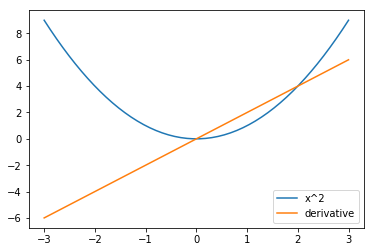

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3, 3)
x_squared, x_squared_der = s.run(
    [scalar_squared, derivative],
    {my_scalar: x}
)

plt.plot(x, x_squared, label="x^2")
plt.plot(x, x_squared_der, label="derivative")
plt.legend()

# Why that rocks

In [21]:
my_vector = tf.placeholder('float32', shape=(None,))

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = tf.reduce_mean((my_vector + my_scalar) ** (1 + tf.nn.moments(my_vector, [0])[1]) + 1. / tf.atan(my_scalar)) / (my_scalar ** 2 + 1) + 0.01 * tf.sin(2 * my_scalar ** 1.5) * (tf.reduce_sum(my_vector) * my_scalar ** 2) * tf.exp((my_scalar-4)**2)/(1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2))/(1+tf.exp(-(my_scalar-4)**2)))**2


der_by_scalar, der_by_vector = tf.gradients(weird_psychotic_function, [my_scalar, my_vector])#<student.compute_grad_over_scalar_and_vector()>

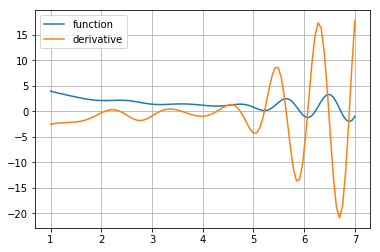

In [22]:
#Plotting your derivative
scalar_space = np.linspace(1, 7, 100)

y = [
    s.run(weird_psychotic_function, {my_scalar: x, my_vector: [1, 2, 3]})
    for x in scalar_space
]

plt.plot(scalar_space, y, label='function')

y_der_by_scalar = [
    s.run(der_by_scalar, {my_scalar: x, my_vector: [1, 2, 3]})
    for x in scalar_space
]

plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid(); plt.legend()

# Almost done - optimizers

While you can perform gradient descent by hand with automatic grads from above, tensorflow also has some optimization methods implemented for you. Recall momentum & rmsprop?

In [23]:
y_guess = tf.Variable(np.zeros(2, dtype='float32'))
y_true = tf.range(1, 3, dtype='float32')

loss = tf.reduce_mean((y_guess - y_true + tf.random_normal([2])) ** 2) 

optimizer = tf.train.MomentumOptimizer(0.01, 0.9).minimize(loss, var_list=[y_guess])

#same, but more detailed:
#opt = tf.train.MomentumOptimizer(0.01,0.9)
#updates = opt.compute_gradients(loss, [y_guess])
#optimizer = opt.apply_gradients(updates)

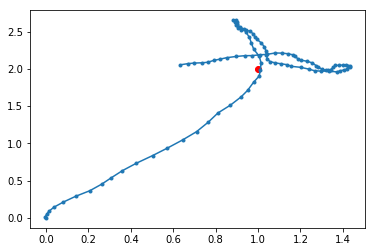

In [24]:
from IPython.display import clear_output

s.run(tf.global_variables_initializer())

guesses = [s.run(y_guess)]

for _ in range(100):
    s.run(optimizer)
    guesses.append(s.run(y_guess))

    clear_output(True)
    plt.plot(*zip(*guesses), marker='.')
    plt.scatter(*s.run(y_true), c='red')
    plt.show()

# Logistic regression example
__[ 4 points max]__

Implement the regular logistic regression training algorithm

Tips:
* Weights and biases fit in as a shared variable
* X and y are potential inputs
* Define loss function and optimizer
* Train regression

In [25]:
from sklearn.datasets import load_digits
mnist = load_digits()

X, y = mnist.data, mnist.target

num_features = X.shape[1]
num_classes = 10

print("y [shape - %s]:"%(str(y.shape)))

print("X [shape - %s]:"%(str(X.shape)))
print(X[:1])
print(y[:10])

y [shape - (1797,)]:
X [shape - (1797, 64)]:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]
[0 1 2 3 4 5 6 7 8 9]


In [26]:
# make target in one-hot format

y = tf.one_hot(y, 10).eval()
print(y.shape)

(1797, 10)


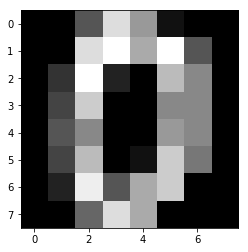

In [27]:
# %% we can visualize any one of the images by reshaping it to a 8x8 image
plt.imshow(np.reshape(mnist.data[0, :], (8, 8)), cmap='gray')

In [28]:
# inputs and shareds
weights = tf.get_variable("weights", shape=(num_features, num_classes), initializer=tf.glorot_uniform_initializer())
bias = tf.get_variable("bias", shape=(num_classes,), initializer=tf.glorot_uniform_initializer())
input_X = tf.placeholder('float32', shape=(None, num_features))
input_y = tf.placeholder('float32', shape=(None, num_classes))

In [38]:
predicted_y = tf.nn.softmax(tf.matmul(input_X, weights) + bias)
loss = -tf.reduce_mean(input_y * tf.log(predicted_y))

optimizer = tf.train.AdamOptimizer().minimize(loss, var_list=[weights, bias])

In [39]:
# accuracy is done for you
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(predicted_y, 1),
                                           tf.argmax(input_y, 1)), "float"))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

loss at iter 0:1.5777
train auc: 0.0616184
test auc: 0.0666667
loss at iter 1:1.5337
train auc: 0.0623608
test auc: 0.0644444
loss at iter 2:1.4907
train auc: 0.0616184
test auc: 0.0755556
loss at iter 3:1.4487
train auc: 0.0631032
test auc: 0.08
loss at iter 4:1.4079
train auc: 0.064588
test auc: 0.0822222
loss at iter 5:1.3681
train auc: 0.0668151
test auc: 0.0844444
loss at iter 6:1.3292
train auc: 0.0653304
test auc: 0.0888889
loss at iter 7:1.2913
train auc: 0.0675575
test auc: 0.0911111
loss at iter 8:1.2542
train auc: 0.0705271
test auc: 0.0977778
loss at iter 9:1.2180
train auc: 0.0742391
test auc: 0.0955556
loss at iter 10:1.1824
train auc: 0.0794358
test auc: 0.1
loss at iter 11:1.1476
train auc: 0.0831477
test auc: 0.0977778
loss at iter 12:1.1134
train auc: 0.0876021
test auc: 0.1
loss at iter 13:1.0799
train auc: 0.0920564
test auc: 0.104444
loss at iter 14:1.0472
train auc: 0.0920564
test auc: 0.111111
loss at iter 15:1.0153
train auc: 0.0965108
test auc: 0.111111
loss at

loss at iter 154:0.1088
train auc: 0.710468
test auc: 0.722222
loss at iter 155:0.1077
train auc: 0.713437
test auc: 0.722222
loss at iter 156:0.1067
train auc: 0.717892
test auc: 0.722222
loss at iter 157:0.1057
train auc: 0.720119
test auc: 0.722222
loss at iter 158:0.1048
train auc: 0.722346
test auc: 0.724444
loss at iter 159:0.1038
train auc: 0.725316
test auc: 0.726667
loss at iter 160:0.1028
train auc: 0.725316
test auc: 0.728889
loss at iter 161:0.1019
train auc: 0.727543
test auc: 0.731111
loss at iter 162:0.1010
train auc: 0.729027
test auc: 0.731111
loss at iter 163:0.1001
train auc: 0.730512
test auc: 0.735556
loss at iter 164:0.0992
train auc: 0.734967
test auc: 0.735556
loss at iter 165:0.0983
train auc: 0.737194
test auc: 0.74
loss at iter 166:0.0975
train auc: 0.737194
test auc: 0.74
loss at iter 167:0.0966
train auc: 0.743133
test auc: 0.74
loss at iter 168:0.0958
train auc: 0.746845
test auc: 0.74
loss at iter 169:0.0950
train auc: 0.746845
test auc: 0.74
loss at iter

loss at iter 309:0.0405
train auc: 0.877506
test auc: 0.857778
loss at iter 310:0.0403
train auc: 0.877506
test auc: 0.862222
loss at iter 311:0.0401
train auc: 0.87899
test auc: 0.862222
loss at iter 312:0.0399
train auc: 0.87899
test auc: 0.862222
loss at iter 313:0.0398
train auc: 0.87899
test auc: 0.862222
loss at iter 314:0.0396
train auc: 0.87899
test auc: 0.862222
loss at iter 315:0.0394
train auc: 0.87899
test auc: 0.862222
loss at iter 316:0.0392
train auc: 0.881218
test auc: 0.862222
loss at iter 317:0.0391
train auc: 0.88196
test auc: 0.862222
loss at iter 318:0.0389
train auc: 0.882702
test auc: 0.862222
loss at iter 319:0.0387
train auc: 0.882702
test auc: 0.862222
loss at iter 320:0.0386
train auc: 0.883445
test auc: 0.862222
loss at iter 321:0.0384
train auc: 0.883445
test auc: 0.862222
loss at iter 322:0.0383
train auc: 0.884187
test auc: 0.862222
loss at iter 323:0.0381
train auc: 0.884187
test auc: 0.862222
loss at iter 324:0.0379
train auc: 0.886414
test auc: 0.86222

loss at iter 460:0.0240
train auc: 0.924276
test auc: 0.893333
loss at iter 461:0.0239
train auc: 0.924276
test auc: 0.893333
loss at iter 462:0.0238
train auc: 0.924276
test auc: 0.893333
loss at iter 463:0.0238
train auc: 0.924276
test auc: 0.893333
loss at iter 464:0.0237
train auc: 0.924276
test auc: 0.893333
loss at iter 465:0.0236
train auc: 0.924276
test auc: 0.893333
loss at iter 466:0.0236
train auc: 0.924276
test auc: 0.893333
loss at iter 467:0.0235
train auc: 0.924276
test auc: 0.893333
loss at iter 468:0.0234
train auc: 0.924276
test auc: 0.893333
loss at iter 469:0.0234
train auc: 0.925019
test auc: 0.893333
loss at iter 470:0.0233
train auc: 0.925019
test auc: 0.893333
loss at iter 471:0.0232
train auc: 0.925019
test auc: 0.893333
loss at iter 472:0.0232
train auc: 0.925019
test auc: 0.893333
loss at iter 473:0.0231
train auc: 0.925761
test auc: 0.893333
loss at iter 474:0.0230
train auc: 0.927246
test auc: 0.893333
loss at iter 475:0.0230
train auc: 0.927246
test auc: 0

loss at iter 608:0.0167
train auc: 0.951002
test auc: 0.904444
loss at iter 609:0.0167
train auc: 0.951002
test auc: 0.904444
loss at iter 610:0.0167
train auc: 0.951002
test auc: 0.904444
loss at iter 611:0.0166
train auc: 0.951002
test auc: 0.904444
loss at iter 612:0.0166
train auc: 0.951002
test auc: 0.904444
loss at iter 613:0.0166
train auc: 0.951002
test auc: 0.904444
loss at iter 614:0.0165
train auc: 0.951002
test auc: 0.904444
loss at iter 615:0.0165
train auc: 0.951002
test auc: 0.904444
loss at iter 616:0.0165
train auc: 0.951002
test auc: 0.904444
loss at iter 617:0.0164
train auc: 0.951002
test auc: 0.904444
loss at iter 618:0.0164
train auc: 0.951002
test auc: 0.904444
loss at iter 619:0.0164
train auc: 0.951002
test auc: 0.904444
loss at iter 620:0.0163
train auc: 0.951002
test auc: 0.904444
loss at iter 621:0.0163
train auc: 0.951002
test auc: 0.906667
loss at iter 622:0.0163
train auc: 0.951002
test auc: 0.906667
loss at iter 623:0.0162
train auc: 0.951002
test auc: 0

loss at iter 756:0.0126
train auc: 0.965108
test auc: 0.931111
loss at iter 757:0.0126
train auc: 0.965108
test auc: 0.931111
loss at iter 758:0.0126
train auc: 0.965108
test auc: 0.931111
loss at iter 759:0.0125
train auc: 0.965108
test auc: 0.931111
loss at iter 760:0.0125
train auc: 0.965108
test auc: 0.931111
loss at iter 761:0.0125
train auc: 0.965108
test auc: 0.931111
loss at iter 762:0.0125
train auc: 0.965108
test auc: 0.931111
loss at iter 763:0.0124
train auc: 0.965108
test auc: 0.931111
loss at iter 764:0.0124
train auc: 0.965108
test auc: 0.931111
loss at iter 765:0.0124
train auc: 0.965108
test auc: 0.931111
loss at iter 766:0.0124
train auc: 0.965108
test auc: 0.931111
loss at iter 767:0.0124
train auc: 0.965108
test auc: 0.931111
loss at iter 768:0.0123
train auc: 0.965108
test auc: 0.931111
loss at iter 769:0.0123
train auc: 0.965108
test auc: 0.931111
loss at iter 770:0.0123
train auc: 0.965108
test auc: 0.931111
loss at iter 771:0.0123
train auc: 0.965108
test auc: 0

loss at iter 893:0.0101
train auc: 0.970304
test auc: 0.935556
loss at iter 894:0.0101
train auc: 0.970304
test auc: 0.935556
loss at iter 895:0.0101
train auc: 0.970304
test auc: 0.935556
loss at iter 896:0.0101
train auc: 0.970304
test auc: 0.935556
loss at iter 897:0.0100
train auc: 0.971047
test auc: 0.935556
loss at iter 898:0.0100
train auc: 0.971047
test auc: 0.935556
loss at iter 899:0.0100
train auc: 0.971047
test auc: 0.935556
loss at iter 900:0.0100
train auc: 0.971789
test auc: 0.935556
loss at iter 901:0.0100
train auc: 0.971789
test auc: 0.935556
loss at iter 902:0.0100
train auc: 0.971789
test auc: 0.935556
loss at iter 903:0.0100
train auc: 0.971789
test auc: 0.935556
loss at iter 904:0.0099
train auc: 0.971789
test auc: 0.935556
loss at iter 905:0.0099
train auc: 0.971789
test auc: 0.935556
loss at iter 906:0.0099
train auc: 0.971789
test auc: 0.935556
loss at iter 907:0.0099
train auc: 0.971789
test auc: 0.935556
loss at iter 908:0.0099
train auc: 0.971789
test auc: 0

loss at iter 1085:0.0078
train auc: 0.980698
test auc: 0.94
loss at iter 1086:0.0078
train auc: 0.980698
test auc: 0.94
loss at iter 1087:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1088:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1089:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1090:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1091:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1092:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1093:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1094:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1095:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1096:0.0077
train auc: 0.980698
test auc: 0.94
loss at iter 1097:0.0076
train auc: 0.980698
test auc: 0.94
loss at iter 1098:0.0076
train auc: 0.980698
test auc: 0.94
loss at iter 1099:0.0076
train auc: 0.98144
test auc: 0.94
loss at iter 1100:0.0076
train auc: 0.98144
test auc: 0.94
loss at iter 1101:0.0076
train auc: 0.9821

test auc: 0.946667
loss at iter 1258:0.0063
train auc: 0.986637
test auc: 0.946667
loss at iter 1259:0.0063
train auc: 0.987379
test auc: 0.946667
loss at iter 1260:0.0063
train auc: 0.987379
test auc: 0.946667
loss at iter 1261:0.0063
train auc: 0.987379
test auc: 0.946667
loss at iter 1262:0.0063
train auc: 0.987379
test auc: 0.946667
loss at iter 1263:0.0063
train auc: 0.987379
test auc: 0.946667
loss at iter 1264:0.0063
train auc: 0.987379
test auc: 0.946667
loss at iter 1265:0.0062
train auc: 0.987379
test auc: 0.946667
loss at iter 1266:0.0062
train auc: 0.987379
test auc: 0.946667
loss at iter 1267:0.0062
train auc: 0.987379
test auc: 0.946667
loss at iter 1268:0.0062
train auc: 0.987379
test auc: 0.946667
loss at iter 1269:0.0062
train auc: 0.987379
test auc: 0.946667
loss at iter 1270:0.0062
train auc: 0.987379
test auc: 0.946667
loss at iter 1271:0.0062
train auc: 0.987379
test auc: 0.946667
loss at iter 1272:0.0062
train auc: 0.987379
test auc: 0.946667
loss at iter 1273:0.0

train auc: 0.991091
test auc: 0.946667
loss at iter 1397:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1398:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1399:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1400:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1401:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1402:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1403:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1404:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1405:0.0054
train auc: 0.991091
test auc: 0.946667
loss at iter 1406:0.0053
train auc: 0.991091
test auc: 0.946667
loss at iter 1407:0.0053
train auc: 0.991091
test auc: 0.946667
loss at iter 1408:0.0053
train auc: 0.991091
test auc: 0.946667
loss at iter 1409:0.0053
train auc: 0.991091
test auc: 0.946667
loss at iter 1410:0.0053
train auc: 0.991091
test auc: 0.946667
loss at iter 1411:0.0053
train auc: 0.991091
test auc: 0.946667
l

loss at iter 1571:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1572:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1573:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1574:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1575:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1576:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1577:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1578:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1579:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1580:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1581:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1582:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1583:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1584:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1585:0.0045
train auc: 0.994803
test auc: 0.955556
loss at iter 1586:0.0045
train auc: 0.99

loss at iter 1761:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1762:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1763:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1764:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1765:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1766:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1767:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1768:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1769:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1770:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1771:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1772:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1773:0.0038
train auc: 0.99703
test auc: 0.957778
loss at iter 1774:0.0037
train auc: 0.99703
test auc: 0.957778
loss at iter 1775:0.0037
train auc: 0.99703
test auc: 0.957778
loss at iter 1776:0.0037
train auc: 0.99703
test auc: 0

test auc: 0.96
loss at iter 1961:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1962:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1963:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1964:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1965:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1966:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1967:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1968:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1969:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1970:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1971:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1972:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1973:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1974:0.0032
train auc: 0.997773
test auc: 0.96
loss at iter 1975:0.0031
train auc: 0.997773
test auc: 0.96
loss at iter 1976:0.0031
train auc: 0.997773
test auc: 0.962222
loss at iter 1977:0.0

loss at iter 2119:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2120:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2121:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2122:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2123:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2124:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2125:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2126:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2127:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2128:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2129:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2130:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2131:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2132:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2133:0.0028
train auc: 0.997773
test auc: 0.962222
loss at iter 2134:0.0028
train auc: 0.99

loss at iter 2279:0.0025
train auc: 0.997773
test auc: 0.962222
loss at iter 2280:0.0025
train auc: 0.997773
test auc: 0.962222
loss at iter 2281:0.0025
train auc: 0.997773
test auc: 0.962222
loss at iter 2282:0.0025
train auc: 0.997773
test auc: 0.962222
loss at iter 2283:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2284:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2285:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2286:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2287:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2288:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2289:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2290:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2291:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2292:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2293:0.0024
train auc: 0.997773
test auc: 0.962222
loss at iter 2294:0.0024
train auc: 0.99

test auc: 0.962222
loss at iter 2425:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2426:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2427:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2428:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2429:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2430:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2431:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2432:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2433:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2434:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2435:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2436:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2437:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2438:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2439:0.0022
train auc: 0.997773
test auc: 0.962222
loss at iter 2440:0.0

test auc: 0.962222
loss at iter 2580:0.0020
train auc: 0.997773
test auc: 0.962222
loss at iter 2581:0.0020
train auc: 0.997773
test auc: 0.962222
loss at iter 2582:0.0020
train auc: 0.997773
test auc: 0.962222
loss at iter 2583:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2584:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2585:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2586:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2587:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2588:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2589:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2590:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2591:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2592:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2593:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2594:0.0019
train auc: 0.997773
test auc: 0.962222
loss at iter 2595:0.0

loss at iter 2782:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2783:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2784:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2785:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2786:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2787:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2788:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2789:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2790:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2791:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2792:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2793:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2794:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2795:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2796:0.0017
train auc: 0.998515
test auc: 0.964444
loss at iter 2797:0.0017
train auc: 0.99

train auc: 0.999258
test auc: 0.964444
loss at iter 2940:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2941:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2942:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2943:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2944:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2945:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2946:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2947:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2948:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2949:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2950:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2951:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2952:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2953:0.0015
train auc: 0.999258
test auc: 0.964444
loss at iter 2954:0.0015
train auc: 0.999258
test auc: 0.964444
l

train auc: 0.999258
test auc: 0.964444
loss at iter 3090:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3091:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3092:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3093:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3094:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3095:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3096:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3097:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3098:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3099:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3100:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3101:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3102:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3103:0.0014
train auc: 0.999258
test auc: 0.964444
loss at iter 3104:0.0014
train auc: 0.999258
test auc: 0.964444
l

loss at iter 3247:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3248:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3249:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3250:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3251:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3252:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3253:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3254:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3255:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3256:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3257:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3258:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3259:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3260:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3261:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3262:0.0013
train auc: 1.0
test auc: 0.964444
loss at iter 3263:0.0013
train auc: 1.0
test auc: 0.9644

loss at iter 3410:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3411:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3412:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3413:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3414:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3415:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3416:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3417:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3418:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3419:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3420:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3421:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3422:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3423:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3424:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3425:0.0011
train auc: 1.0
test auc: 0.964444
loss at iter 3426:0.0011
train auc: 1.0
test auc: 0.9644

loss at iter 3571:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3572:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3573:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3574:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3575:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3576:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3577:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3578:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3579:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3580:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3581:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3582:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3583:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3584:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3585:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3586:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3587:0.0010
train auc: 1.0
test auc: 0.9666

loss at iter 3726:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3727:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3728:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3729:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3730:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3731:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3732:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3733:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3734:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3735:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3736:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3737:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3738:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3739:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3740:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3741:0.0010
train auc: 1.0
test auc: 0.966667
loss at iter 3742:0.0010
train auc: 1.0
test auc: 0.9666

test auc: 0.966667
loss at iter 3887:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3888:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3889:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3890:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3891:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3892:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3893:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3894:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3895:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3896:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3897:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3898:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3899:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3900:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3901:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3902:0.0009
train auc: 1.0
test auc: 0.966667
loss at iter 3903:0.0009
train auc: 1

train auc: 1.0
test auc: 0.966667
loss at iter 4048:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4049:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4050:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4051:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4052:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4053:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4054:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4055:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4056:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4057:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4058:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4059:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4060:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4061:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4062:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4063:0.0008
train auc: 1.0
test auc: 0.966667
loss at iter 4064:0.00

loss at iter 4209:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4210:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4211:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4212:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4213:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4214:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4215:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4216:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4217:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4218:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4219:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4220:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4221:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4222:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4223:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4224:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4225:0.0007
train auc: 1.0
test auc: 0.9666

loss at iter 4360:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4361:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4362:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4363:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4364:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4365:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4366:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4367:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4368:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4369:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4370:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4371:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4372:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4373:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4374:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4375:0.0007
train auc: 1.0
test auc: 0.966667
loss at iter 4376:0.0007
train auc: 1.0
test auc: 0.9666

loss at iter 4518:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4519:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4520:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4521:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4522:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4523:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4524:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4525:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4526:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4527:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4528:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4529:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4530:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4531:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4532:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4533:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4534:0.0006
train auc: 1.0
test auc: 0.9666

test auc: 0.966667
loss at iter 4680:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4681:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4682:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4683:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4684:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4685:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4686:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4687:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4688:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4689:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4690:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4691:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4692:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4693:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4694:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4695:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4696:0.0006
train auc: 1

loss at iter 4822:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4823:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4824:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4825:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4826:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4827:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4828:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4829:0.0006
train auc: 1.0
test auc: 0.966667
loss at iter 4830:0.0005
train auc: 1.0
test auc: 0.966667
loss at iter 4831:0.0005
train auc: 1.0
test auc: 0.966667
loss at iter 4832:0.0005
train auc: 1.0
test auc: 0.966667
loss at iter 4833:0.0005
train auc: 1.0
test auc: 0.966667
loss at iter 4834:0.0005
train auc: 1.0
test auc: 0.966667
loss at iter 4835:0.0005
train auc: 1.0
test auc: 0.966667
loss at iter 4836:0.0005
train auc: 1.0
test auc: 0.966667
loss at iter 4837:0.0005
train auc: 1.0
test auc: 0.966667
loss at iter 4838:0.0005
train auc: 1.0
test auc: 0.9666

train auc: 1.0
test auc: 0.968889
loss at iter 4971:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4972:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4973:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4974:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4975:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4976:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4977:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4978:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4979:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4980:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4981:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4982:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4983:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4984:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4985:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4986:0.0005
train auc: 1.0
test auc: 0.968889
loss at iter 4987:0.00

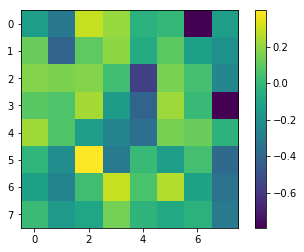

In [42]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(5000):
    sess.run(optimizer, {input_X: X_train, input_y: y_train})
    loss_i = sess.run(loss, {input_X: X_train, input_y: y_train})

    print ("loss at iter %i:%.4f"%(i, loss_i))

    print ("train auc:", sess.run(accuracy, feed_dict={input_X: X_train, input_y: y_train}))
    print ("test auc:", sess.run(accuracy, feed_dict={input_X: X_test, input_y: y_test}))

print ("resulting weights:")
plt.imshow(sess.run(weights)[:, 0].reshape(8,-1))
plt.colorbar()

# my1stNN
__[basic part 4 points max]__
Your ultimate task for this week is to build your first neural network [almost] from scratch and pure tensorflow.

This time you will same digit recognition problem, but at a larger scale
* images are now 28x28
* 10 different digits
* 50k samples

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) NN should already have ive you an edge over logistic regression.

__[bonus score]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! The milestones would be 95%/97.5%/98.5% accuraсy on test set.

__SPOILER!__
At the end of the notebook you will find a few tips and frequently made mistakes. If you feel enough might to shoot yourself in the foot without external assistance, we encourage you to do so, but if you encounter any unsurpassable issues, please do look there before mailing us.


In [ ]:
from mnist import load_dataset

#[down]loading the original MNIST dataset.
#Please note that you should only train your NN on _train sample,
# _val can be used to evaluate out-of-sample error, compare models or perform early-stopping
# _test should be hidden under a rock untill final evaluation... But we both know it is near impossible to catch you evaluating on it.
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

print(X_train.shape, y_train.shape)

In [ ]:
plt.imshow(X_train[0,0])

In [ ]:
<here you could just as well create computation graph>

input_X = tf.placeholder(<student code here>)
input_y = tf.placeholder(<student code here>)

# if you want a particular initialization, check docs and find it there
# i.e., for Glorot Uniform you may import the following
# from tf.contrib.keras.initializers import glorot_uniform

# below is just an EXAMPLE! You can change everything
nn = tf.layers.dense(input_X, <student code here or just 50>, activation=tf.nn.sigmoid) #< some layer 1> 
nn = tf.layers.dense(<student code here>) # <some layer 2>
...
<some layer n>

predicted_y = tf.nn.softmax(<student code here>)

In [ ]:
<this may or may not be a good place to evaluating loss and optimizer>

loss = #tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = predicted_y, labels = input_y))

optimizer = #tf.train.AdamOptimizer(0.01).minimize(loss, var_list=(weights, bias))

In [ ]:
<this may be a perfect cell to write a training&evaluation loop in>

sess_large = tf.Session()
sess_large.run(tf.global_variables_initializer())

def mnist_batch_generator(<student code here>):
    <student code here>
    #yield <student code here>

# %% We'll train in minibatches and report accuracy:
batch_size = <student code here>
n_epochs = <student code here>

for epoch_i in range(n_epochs):
    for batch_i in range(<student code here>):
        
        batch_xs, batch_ys = <student code here: get next batch>
            
        sess_large.run(optimizer, feed_dict={
            input_X: batch_xs, input_y: batch_ys})
        
    print("accuracy at iter %i: "%(i),\
          sess_large.run(accuracy,
                   feed_dict={
                       input_X: <student code here: val data>,
                       input_y: <student code here: val target>
                   }))

In [ ]:
<predict & evaluate on test here, right? No cheating pls.>

print("Test accuracy:, ", sess_large.run(accuracy,
                   feed_dict={
                       input_X: <student code here: test data>,
                       input_y: <student code here: test target>
                   }))

# Report

I did such and such, that did that cool thing and my stupid NN bloated out that stuff. Finally, i did that thingy and felt like Le'Cun. That cool article and that kind of weed helped me so much (if any).

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


# SPOILERS!

Recommended pipeline

* Adapt logistic regression from previous assignment to classify some number against others (e.g. zero vs nonzero)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - softmax (exp over sum of exps) can implemented manually or as T.nnet.softmax (stable)
  - probably better to use STOCHASTIC gradient descent (minibatch)
    - in which case sample should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (sigmoid) instead of softmax
  - You need to train both layers, not just output layer :)
  - Do not initialize layers with zeros (due to symmetry effects). A gaussian noize with small sigma will do.
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve. 
  - In ideal casae this totals to 2 .dot's, 1 softmax and 1 sigmoid
  - __make sure this neural network works better than logistic regression__
  
* Now's the time to try improving the network. Consider layers (size, neuron count),  nonlinearities, optimization methods, initialization - whatever you want, but please avoid convolutions for now.
  